### DEIT-III Pre-trained Artifacts

In [92]:
import torchvision
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
from PIL import Image
import numpy as np
import torch
import matplotlib.pyplot as plt



In [93]:
from models_v2 import *

In [94]:
tiny = deit_tiny_patch16_LS(pretrained=True, img_size=384, pretrained_21k = True)
small = deit_small_patch16_LS(pretrained=True, img_size=384, pretrained_21k = True)
base = deit_base_patch16_LS(pretrained=True, img_size=384, pretrained_21k = True) 
large = deit_large_patch16_LS(pretrained=True, img_size=384, pretrained_21k = True)

In [115]:
def show_artifacts(test_model, test_image):
    """
    Generate the Attention maps and the norm values for the DEIT-III model

    test_model: DEIT-III model to be tested,
    test_image:  Image of the correct size for the corresponding model, and batch dimension is accounted for

    """

    test_model(test_image)

    ## Norm of feature values after MLP
    output = test_model.block_output['final']
    output = output.squeeze(0)
    output = output[1:]
    #output.shape
    # copmute norm of all output elements
    output_norms = output.norm(dim=-1)
    #output_norms.shape
    
    plt.imshow(output_norms.reshape(24, 24).detach().numpy())
    plt.axis('off')  # Turn off axis labels
    plt.colorbar(label='Norm Values')  # Add a colorbar as a legend
    plt.show()

    plt.hist(output_norms.detach().numpy(), bins=50)
    plt.xlabel('Norm Values')
    plt.ylabel('Frequency')
    plt.show()

    ## Attention maps for the last Attention Head

    
    attn_map_mean = test_model.blocks[len(test_model.blocks)-1].attn.attn_map.squeeze(0).mean(dim=0)
    attn_map_mean = attn_map_mean[0][1:]
    #attn_map_mean.shape

    plt.imshow(attn_map_mean.reshape(24, 24).detach().numpy())
    plt.axis('off') 
    plt.colorbar(label='CLS attention map')  
    plt.show()



    ## All attention maps
    num_images = len(test_model.blocks)
    num_cols = 6
    num_rows = (num_images + num_cols - 1) // num_cols  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 2.5))
    axes = axes.flatten()

    for i in range(num_images):
        attn_map = test_model.blocks[i].attn.attn_map.squeeze(0).mean(dim=0)
        attn_map = attn_map[0][1:]
        attn_map_img = attn_map.reshape(24, 24).detach().numpy()

        axes[i].imshow(attn_map_img)
        axes[i].axis('off')
        axes[i].set_title(f'Block {i+1}')

    # Hide any remaining empty subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


    # # Attention maps, last layer, all tokens
    # num_tokens = 24 * 24
    # num_cols = 6
    # num_rows = (num_tokens + num_cols - 1) // num_cols  # Calculate the number of rows needed

    # fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 2.5))
    # axes = axes.flatten()

    # for i in range(num_tokens):
    #     attn_map = test_model.blocks[len(test_model.blocks)-1].attn.attn_map.squeeze(0).mean(dim=0)
    #     attn_map = attn_map[i][1:]
    #     attn_map_img = attn_map.reshape(24, 24).detach().numpy()

    #     axes[i].imshow(attn_map_img)
    #     axes[i].axis('off')
    #     axes[i].set_title(f'Token {i+1}')
    


In [116]:
transform = transforms.Compose([
    transforms.Resize((384, 384)),  # Resize to match model input
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
# train_dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
# image = train_dataset[0][0]
# image.shape


Files already downloaded and verified


torch.Size([3, 384, 384])

In [127]:
import torchvision.transforms as transforms
from torchvision.utils import make_grid

# Assume `image_tensor` is a tensor of shape (3, H, W), e.g., (3, 32, 32)
def plot_image(image_tensor):
    # Undo normalization if needed (optional step)

    # Convert tensor to NumPy format
    image_np = image_tensor.permute(1, 2, 0).numpy()  # Rearrange to (H, W, C)

    # Clip values to the valid range [0, 1]
    image_np = image_np.clip(0, 1)

    # Plot the image
    plt.imshow(image_np)
    plt.axis('off')  # Turn off axis labels
    plt.show()

# Example: Plot a single image from CIFAR-100
import torchvision



### Nice stuff

In [122]:
chosen_one = base

In [134]:
image = 'dog.JPEG'

In [135]:
from PIL import Image
import numpy as np
import torch

# Open the image
img = Image.open('./images/' + image).convert('RGB')

# Resize the image to 384x384
img = img.resize((384, 384))

# Convert the image to a NumPy array and transpose the dimensions
img = np.array(img).transpose(2, 0, 1)

# Convert the NumPy array to a PyTorch tensor and normalize the values
img = torch.tensor(img).float() / 255.0

# Add a batch dimension
img = img.unsqueeze(0)

img.shape


torch.Size([1, 3, 384, 384])

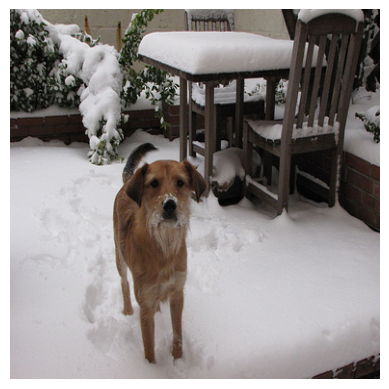

In [136]:
plot_image(img.squeeze(0))

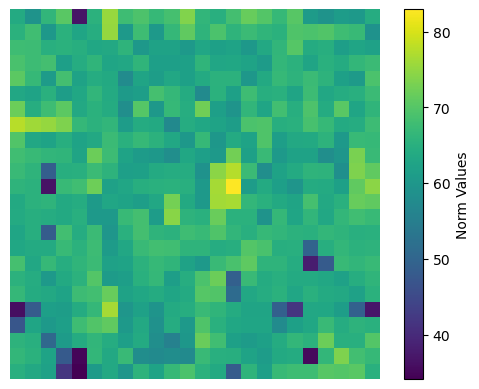

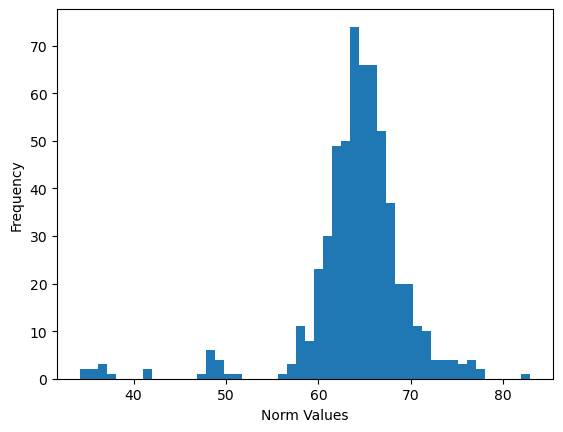

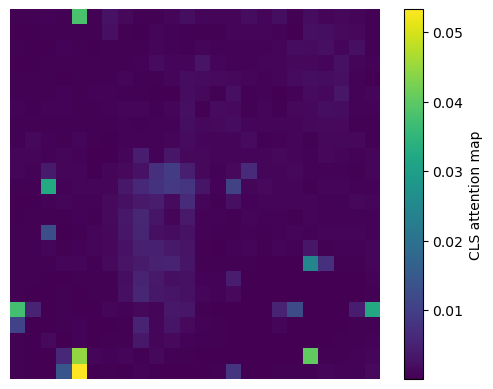

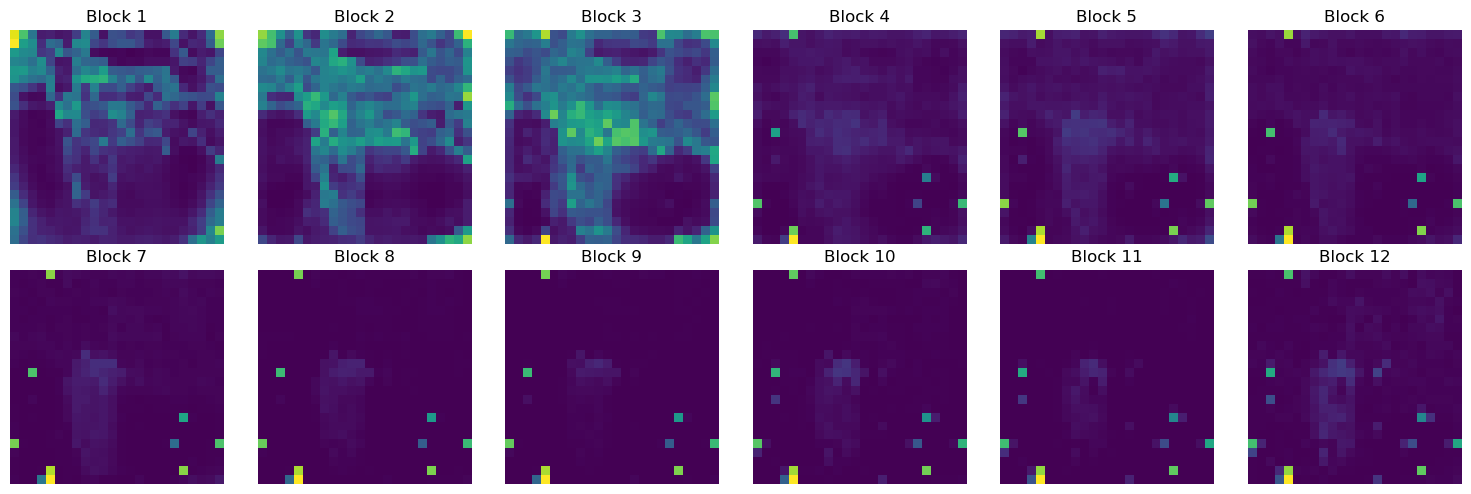

In [130]:
show_artifacts(test_model=chosen_one, test_image=img)